In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/skymoonlight/biased-sents-annotation/master/Sora_LREC2020_biasedsentences.csv")
df.head()

,id_event,event,date_event,id_article,source,source_bias,url,ref,ref_url,article_bias,...,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19
0,1,Johnson,2017-12-15,1.0,001_Washington Post_1,left-center,https://www.washingtonpost.com/news/post-natio...,Reuters,https://www.reuters.com/article/us-kentucky-jo...,1,...,"[10]: Johnson's wife, Rebecca, announced Thurs...",[11]: She spent the day at a funeral home arra...,"[12]: ""Dan is gone but the story of his life i...","[13]: ""These high-tech lynchings based on lies...",[14]: I've been fighting behind my husband for...,"[15]: Johnson's death shook his family, friend...",[16]: Gov.,"[17]: Matt Bevin (R) wrote on Twitter: ""My hea...","[18]: [White House urges Roy Moore to concede,...","[19]: The tumult began Monday, when the Kentuc..."
1,1,Johnson,2017-12-15,1.0,001_Washington Post_1,left-center,https://www.washingtonpost.com/news/post-natio...,Reuters,https://www.reuters.com/article/us-kentucky-jo...,3,...,"[10]: Johnson's wife, Rebecca, announced Thurs...",[11]: She spent the day at a funeral home arra...,"[12]: ""Dan is gone but the story of his life i...","[13]: ""These high-tech lynchings based on lies...",[14]: I've been fighting behind my husband for...,"[15]: Johnson's death shook his family, friend...",[16]: Gov.,"[17]: Matt Bevin (R) wrote on Twitter: ""My hea...","[18]: [White House urges Roy Moore to concede,...","[19]: The tumult began Monday, when the Kentuc..."
2,1,Johnson,2017-12-15,1.0,001_Washington Post_1,left-center,https://www.washingtonpost.com/news/post-natio...,Reuters,https://www.reuters.com/article/us-kentucky-jo...,3,...,"[10]: Johnson's wife, Rebecca, announced Thurs...",[11]: She spent the day at a funeral home arra...,"[12]: ""Dan is gone but the story of his life i...","[13]: ""These high-tech lynchings based on lies...",[14]: I've been fighting behind my husband for...,"[15]: Johnson's death shook his family, friend...",[16]: Gov.,"[17]: Matt Bevin (R) wrote on Twitter: ""My hea...","[18]: [White House urges Roy Moore to concede,...","[19]: The tumult began Monday, when the Kentuc..."
3,1,Johnson,2017-12-15,1.0,001_Washington Post_1,left-center,https://www.washingtonpost.com/news/post-natio...,Reuters,https://www.reuters.com/article/us-kentucky-jo...,3,...,"[10]: Johnson's wife, Rebecca, announced Thurs...",[11]: She spent the day at a funeral home arra...,"[12]: ""Dan is gone but the story of his life i...","[13]: ""These high-tech lynchings based on lies...",[14]: I've been fighting behind my husband for...,"[15]: Johnson's death shook his family, friend...",[16]: Gov.,"[17]: Matt Bevin (R) wrote on Twitter: ""My hea...","[18]: [White House urges Roy Moore to concede,...","[19]: The tumult began Monday, when the Kentuc..."
4,1,Johnson,2017-12-15,2.0,002_CNN_1,left,http://www.cnn.com/2017/12/14/us/kentucky-stat...,Reuters,https://www.reuters.com/article/us-kentucky-jo...,4,...,"[10]: The accuser, identified as Maranda Richm...",[11]: She said she was staying in a living are...,[12]: The center got its hands on police docum...,"[13]: Johnson denied the allegations, a day af...","[14]: ""This allegation concerning this young g...","[15]: ""As a matter of fact, some of this I hea...",[16]: The same day Johnson held a news confere...,[17]: Johnson posted a message on his Facebook...,[18]: The post appears to have been deleted.,"[19]: ""GOD and only GOD knows the truth, nothi..."


In [2]:
df.columns

Index(['id_event', 'event', 'date_event', 'id_article', 'source',
       'source_bias', 'url', 'ref', 'ref_url', 'article_bias', 't', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', 'preknow', 'reftitle', 'reftext',
       'doctitle', 'docbody', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7',
       's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17',
       's18', 's19'],
      dtype='object')

In [20]:
text, scores = [], []


def format_df(ind, text, scores):
    sentence_df = df[[str(ind), 's'+str(ind)]]
    sentence_df = sentence_df.dropna()

    for sentence in set(sentence_df['s'+str(ind)]):
        score = sentence_df[sentence_df['s'+str(ind)] == sentence].mean().iloc[0]
        text.append(sentence[sentence.index(":")+2:])
        scores.append(score)

    return text, scores

for i in range(20):
    text, scores = format_df(i, text, scores)

C:\Users\samue\AppData\Local\Temp\ipykernel_19032\727445637.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score = sentence_df[sentence_df['s'+str(ind)] == sentence].mean().iloc[0]
C:\Users\samue\AppData\Local\Temp\ipykernel_19032\727445637.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score = sentence_df[sentence_df['s'+str(ind)] == sentence].mean().iloc[0]
C:\Users\samue\AppData\Local\Temp\ipykernel_19032\727445637.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  score 

,text,score
0,A data analytics firm that worked with Donald ...,2.00
1,President Trump showed an awkward sense of tim...,2.75
2,"We've been promised by Google, Facebook, and o...",2.25
3,(CNN) A Kentucky lawmaker accused of sexually ...,2.25
4,Dallas Cowboys head coach Jason Garrett at the...,1.60
...,...,...
832,"It's a game, ultimately, of restraint.",3.00
833,Shut up.,3.00
834,This is the third time from the podium-always ...,2.20
835,Former San Francisco 49ers quarterback Colin K...,2.00


In [21]:
df = pd.DataFrame({'text': text, 'score': scores})
df

,text,score
0,A data analytics firm that worked with Donald ...,2.00
1,President Trump showed an awkward sense of tim...,2.75
2,"We've been promised by Google, Facebook, and o...",2.25
3,(CNN) A Kentucky lawmaker accused of sexually ...,2.25
4,Dallas Cowboys head coach Jason Garrett at the...,1.60
...,...,...
832,"It's a game, ultimately, of restraint.",3.00
833,Shut up.,3.00
834,This is the third time from the podium-always ...,2.20
835,Former San Francisco 49ers quarterback Colin K...,2.00


<AxesSubplot:ylabel='Frequency'>

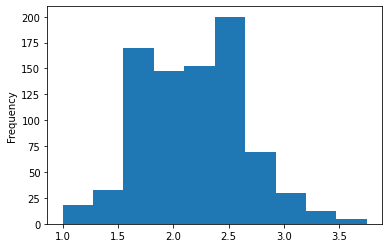

In [26]:
df.score.plot(kind='hist')

In [33]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [34]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = list(df['score'])
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [35]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

669 84 84


In [37]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.L1Loss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):
    
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)
                train_label = train_label.type(torch.LongTensor)
                train_label = train_label.to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.type(torch.LongTensor)
                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label)
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
               | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 3
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 335/335 [01:03<00:00,  5.25it/s]


Epochs: 1 | Train Loss:  0.583                | Train Accuracy:  0.000                 | Val Loss:  0.408                 | Val Accuracy:  0.000


100%|██████████| 335/335 [01:04<00:00,  5.23it/s]


Epochs: 2 | Train Loss:  0.311                | Train Accuracy:  0.000                 | Val Loss:  0.249                 | Val Accuracy:  0.000


100%|██████████| 335/335 [01:10<00:00,  4.73it/s]


Epochs: 3 | Train Loss:  0.286                | Train Accuracy:  0.000                 | Val Loss:  0.258                 | Val Accuracy:  0.000


In [41]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    criterion = nn.L1Loss()
    criterion = criterion.cuda()

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.type(torch.LongTensor)
            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
            print(output)
            print(test_label)
            
            mse = criterion(output, test_label)
            #acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += mse
    
    print(f'Total mse: {total_acc_test}')
    
evaluate(model, df_test)

tensor([[1.3769],
        [1.8317]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.3728],
        [2.5409]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[2.3404],
        [0.7631]], device='cuda:0')
tensor([1, 2], device='cuda:0')
tensor([[2.4742],
        [1.5975]], device='cuda:0')
tensor([2, 2], device='cuda:0')


C:\Users\samue\anaconda3\envs\urop\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


tensor([[0.8935],
        [2.2618]], device='cuda:0')
tensor([1, 1], device='cuda:0')
tensor([[1.6965],
        [2.1093]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.9831],
        [0.9347]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.4533],
        [0.4974]], device='cuda:0')
tensor([1, 2], device='cuda:0')
tensor([[1.9308],
        [0.8924]], device='cuda:0')
tensor([2, 1], device='cuda:0')
tensor([[2.0495],
        [2.0649]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[2.0298],
        [1.7821]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[2.5617],
        [1.4878]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.7267],
        [1.9180]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.9202],
        [1.4766]], device='cuda:0')
tensor([2, 2], device='cuda:0')
tensor([[1.7659],
        [1.2285]], device='cuda:0')
tensor([1, 3], device='cuda:0')
tensor([[1.8530],
        [1.9803]], device='cuda:0')
